# Analyzing Police Activity in Wisconsin

We'll be analyzing a dataset of traffic stopped by police in __Wisconsin__ that was collected by the [Stanford Open Policing Project](https://openpolicing.stanford.edu/). It is about __1 million__ data recorded from _2010 to 2016_. We may need to careful about the data size; i.e if We have large dataset, Our local machine may not be able to support.

### Things that we want to find out
1. In term of top traffic violation, is there a difference in gender? Many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Is this true?
2. During a traffic stop, the police officer sometimes conducts a search of the vehicle. Does gender make difference for search?
3. When is the peak traffic police activity?
4. In a small portion of traffic stops, drugs are found in the vehicle during a search. Is it in rising trend? Does more search lead to discovery of more drugs found?




### Disclaimer :
The **Stanford Open Policing Project** data are made available under the [Open Data Commons Attribution License](https://opendatacommons.org/licenses/by/summary/).
This project is a practise after studying a **DataCamp SKILL Track - Data Manipulation with Python**.

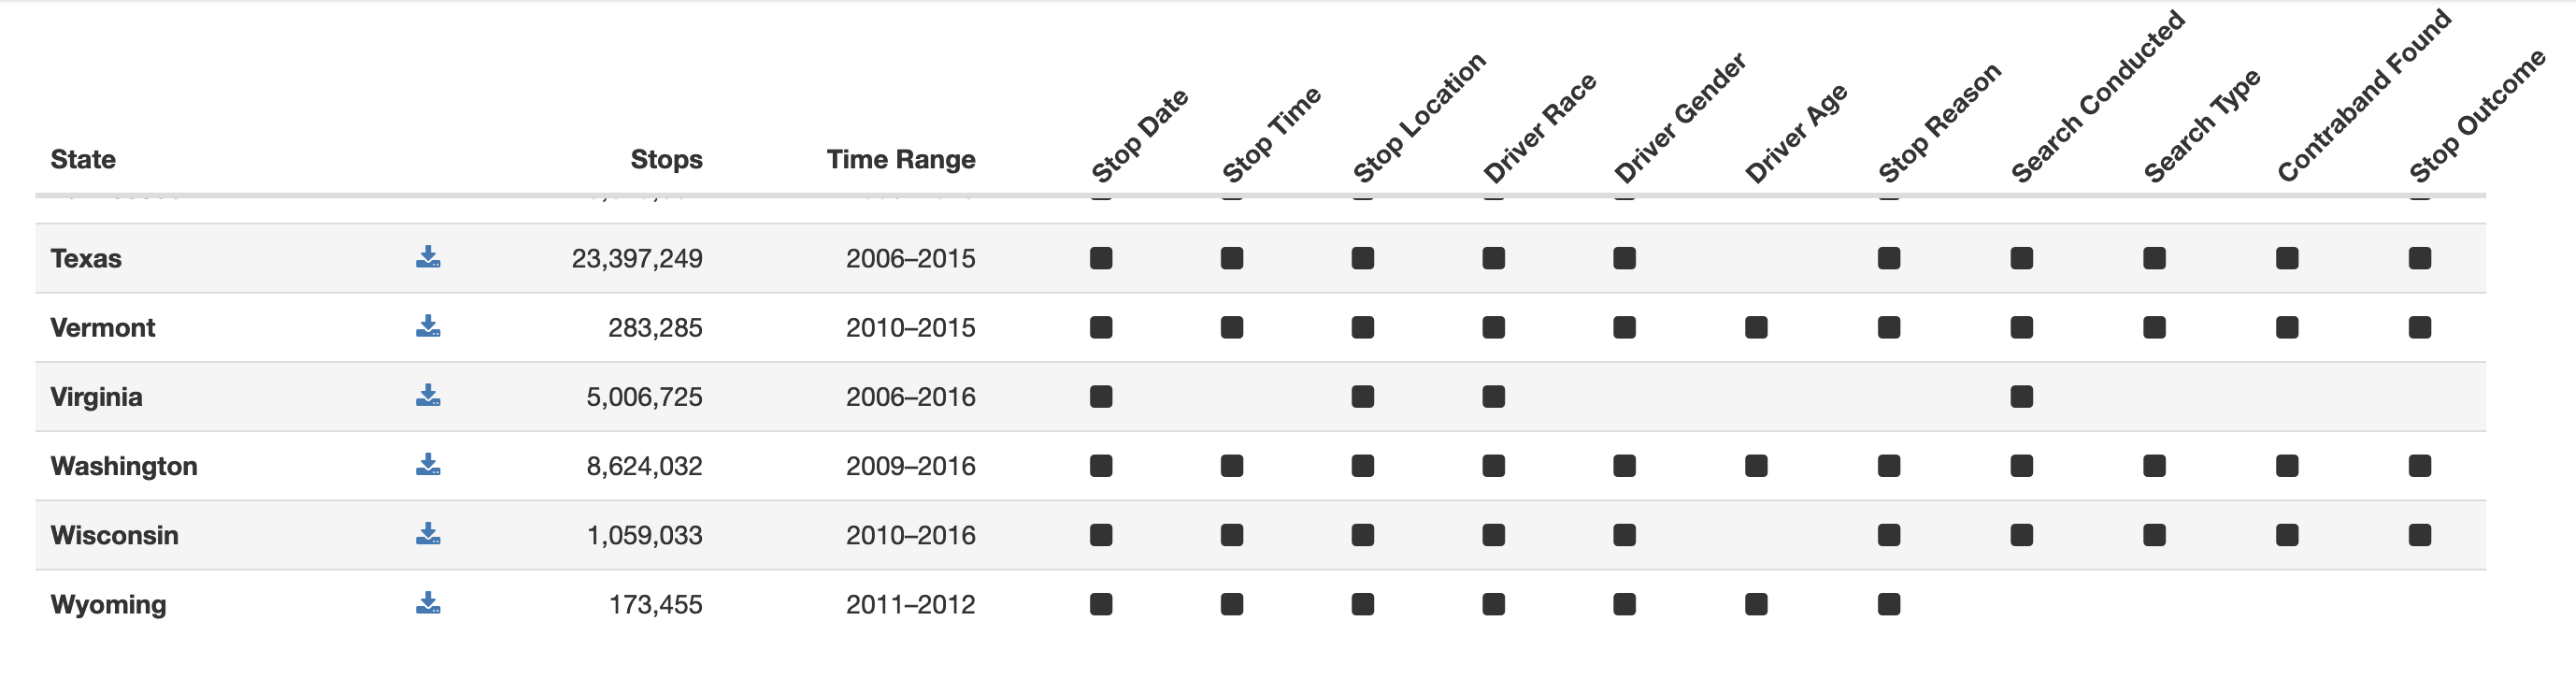

## Getting the dataset

Before beginning Our analysis, it's important that We familiarize Ourself with the dataset. We'll read the dataset into pandas, examine the first few rows, and then count the number of missing values.

In [ ]:
# Import the pandas library as pd
import pandas as pd

# Download dataset
!wget -N https://stacks.stanford.edu/file/druid:py883nd2578/WI-clean.csv.gz
!gunzip --keep WI-clean.csv.gz

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('WI-clean.csv')

# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum());

## Dropping columns
Often, a DataFrame will contain columns that are not useful to Our analysis. Such columns should be dropped from the DataFrame, to make it easier for We to focus on the remaining columns.

In [ ]:
# Count the number of missing values in each column.
print(ri.isnull().sum())

# Examine the DataFrame shape to find out the number of rows and columns
print(ri.shape)

After looking at the data,  we'll drop the ```driver_age``` and ```driver_age_raw``` column because it only contains missing values, and we'll drop the ```state``` column because all of the traffic stops took place in one state (Wisconsin). Thus, these columns can be dropped because they contain no useful information.

In [ ]:
# Drop both county_name and state columns by passing the column names to
# the .drop() mehtod as a list of strings.
ri.drop(['driver_age_raw','driver_age','state'], axis='columns', inplace = True)

# Examine the shape again to verify that there are now two fewer columns
print(ri.shape);

## Dropping rows
When We know that a specific column will be critical to Our analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

For this exercise, the ```driver_gender``` column will be critical to many of Our analyses. Because only a small fraction of rows are missing driver_gender, we'll drop those rows from the dataset.

In [ ]:
# Count the number of missing values in each column.
print(ri.isnull().sum())

# Drop all rows that are missing driver_gender by passing the column name 
# to the subset parameter of .dropna().
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column again, 
# to verify that none of the remaining rows are missing driver_gender.
print(ri.isnull().sum())

# Examine the DataFrame's .shape to see how many rows and columns remain.
print(ri.shape)

## Finding an incorrect data type
The ```dtypes``` attribute of the ```ri``` DataFrame has been printed for We. Our task is to explore the ```ri``` DataFrame in the IPython Shell to determine which column's data type should be changed.

In [ ]:
ri.dtypes

## Combining object columns
Currently, the date and time of each traffic stop are stored in separate object columns: ```stop_date``` and ```stop_time```.

We'll combine these two columns into a single column, and then convert it to ```datetime``` format. This will enable convenient date-based attributes that we'll use later.

In [ ]:
# Use a string method to concatenate stop_date and stop_time (separated by a space), 
# and store the result in combined.
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert combined to datetime format, and store the result in a new column named stop_datetime.
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the DataFrame .dtypes to confirm that stop_datetime is a datetime column.
print(ri.dtypes)

## Setting the index
The last step that we'll take in this chapter is to set the ```stop_datetime``` column as the DataFrame's index. By replacing the default index with a ```DatetimeIndex```, we'll make it easier to analyze the dataset by date and time, which will come in handy later!

In [ ]:
# Set stop_datetime as the DataFrame index.
ri.set_index('stop_datetime', inplace=True)

# Examine the index to verify that it is a DatetimeIndex.
print(ri.index)

# Examine the DataFrame columns to confirm that stop_datetime is no longer one of the columns.
print(ri.columns)

## Examining traffic violations
Before comparing the violations being committed by each gender, We should examine the violations committed by all drivers to get a baseline understanding of the data.

we'll count the unique values in the ```violation``` column, and then separately express those counts as proportions.

In [ ]:
# Count the unique values in the violation column, to see what violations are being committed by all drivers.
print(ri.violation.value_counts())

# Express the violation counts as proportions of the total.
print(ri.violation.value_counts(normalize=True))

## Comparing violations by gender
The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

we'll first create a DataFrame for each gender, and then analyze the violations in each DataFrame separately.

In [ ]:
# Create a DataFrame, female, that only contains rows in which driver_gender is 'F'.
female = ri[ri.driver_gender == 'F']

# Create a DataFrame, male, that only contains rows in which driver_gender is 'M'.
male = ri[ri.driver_gender == 'M']

# Count the violations committed by female drivers and express them as proportions.
print(female.violation.value_counts(normalize=True))

# Count the violations committed by male drivers and express them as proportions.
print(male.violation.value_counts(normalize=True))

## Filtering by multiple conditions
Which one of these commands would filter the ```ri``` DataFrame to only include female drivers who were stopped for a speeding violation?

In [ ]:
ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

## Comparing speeding outcomes by gender
When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can We find evidence of this in the dataset?

First, we'll create two DataFrames of drivers who were stopped for speeding: one containing females and the other containing males.

Then, for each gender, we'll use the ```stop_outcome``` column to calculate what percentage of stops resulted in a "Citation" (meaning a ticket) versus a "Warning".

In [ ]:
# Create a DataFrame, female_and_speeding, that only includes female drivers who were stopped for speeding.
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Create a DataFrame, male_and_speeding, that only includes male drivers who were stopped for speeding.
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Count the stop outcomes for the female drivers and express them as proportions.
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Count the stop outcomes for the male drivers and express them as proportions.
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

## Calculating the search rate
During a traffic stop, the police officer sometimes conducts a search of the vehicle. we'll calculate the percentage of all stops that result in a vehicle search, also known as the search rate.

In [ ]:
# Check the data type of search_conducted to confirm that it's a Boolean Series.
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the Series values and expressing them as proportions.
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean of the Series. 
# It should match the proportion of True values calculated above.
print(ri.search_conducted.mean())

## Comparing search rates by gender
We'll compare the rates at which female and male drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about 16%.

First, we'll filter the DataFrame by gender and calculate the search rate for each group separately. Then, we'll perform the same calculation for both genders at once using a ```.groupby()```.

In [ ]:
ri['search_conducted'] = ri.search_conducted.astype(bool)

# Filter the DataFrame to only include female drivers, and then calculate the search rate 
# by taking the mean of search_conducted.
print(ri[ri.driver_gender == 'F'].search_conducted.mean())

# Filter the DataFrame to only include male drivers, and then repeat the search rate calculation.
print(ri[ri.driver_gender == 'M'].search_conducted.mean())

# Group by driver gender to calculate the search rate for both groups simultaneously. 
# It should match the previous results.
print(ri.groupby('driver_gender').search_conducted.mean())

## Adding a second factor to the analysis
Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, We might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

We can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, We would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

In [ ]:
# Use a .groupby() to calculate the search rate for each combination of gender and violation. 
# Are males and females searched at about the same rate for each violation?
print(ri.groupby(['driver_gender','violation']).search_conducted.mean())

# Reverse the ordering to group by violation before gender. 
# The results may be easier to compare when presented this way.
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())

# Does time of day affect arrest rate?

## Calculating the hourly arrest rate
When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. we'll find out whether the arrest rate varies by time of day.

First, we'll calculate the arrest rate across all stops. Then, we'll calculate the hourly arrest rate by using the ```hour``` attribute of the index. The ```hour``` ranges from 0 to 23, in which:

0 = midnight
12 = noon
23 = 11 PM

In [ ]:
# Take the mean of the is_arrested column to calculate the overall arrest rate.
print(ri.is_arrested.mean())

# Group by the hour attribute of the DataFrame index to calculate the hourly arrest rate.
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate Series as a new object, hourly_arrest_rate.
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

## Plotting the hourly arrest rate
we'll create a line plot from the ```hourly_arrest_rate``` object. A line plot is appropriate in this case because We're showing how a quantity changes over time.

This plot should help We to spot some trends that may not have been obvious when examining the raw numbers!

In [ ]:
# Import matplotlib.pyplot using the alias plt.
import matplotlib.pyplot as plt

# Create a line plot of hourly_arrest_rate using the .plot() method.
hourly_arrest_rate.plot()

# Label the x-axis as 'Hour', label the y-axis as 'Arrest Rate', and title the plot 'Arrest Rate by Time of Day'.
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot using the .show() function.
plt.show()

# Are drug-related stops on the rise?

## Plotting drug-related stops
In a small portion of traffic stops, drugs are found in the vehicle during a search. 
we'll assess whether these drug-related stops are becoming more common over time.

The Boolean column ```drugs_related_stop``` indicates whether drugs were found during a given stop. 
We'll calculate the annual drug rate by resampling this column, and then we'll use a line plot 
to visualize how the rate has changed over time.

In [ ]:
# Calculate the annual rate of drug-related stops 
# by resampling the drugs_related_stop column (on the 'A' frequency) and taking the mean.
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual drug rate Series as a new object, annual_drug_rate.
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of annual_drug_rate using the .plot() method.
annual_drug_rate.plot()

# Display the plot using the .show() function.
plt.show()

## Comparing drug and search rates
As we saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. We might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

We can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then we'll see both rates increasing over time.

In [ ]:
# Calculate the annual search rate by resampling the search_conducted column, 
# and save the result as annual_search_rate.
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate annual_drug_rate and annual_search_rate along the columns axis, and save the result as annual.
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots of the drug and search rates from the annual DataFrame.
annual.plot(subplots=True)

# Display the subplots.
plt.show()

# What violations are caught in each district?

## Tallying violations by district
The state of Rhode Island is broken into 72 counties. How do the county compare in terms of what violations are caught by police?

we'll create a frequency table to determine how many violations of each type took place in each of the counties.

In [ ]:

# Create a frequency table from the district and violation columns using the pd.crosstab() function.
print(pd.crosstab(ri.county_name, ri.violation))

# Save the frequency table as a new object, all_zones.
all_zones = pd.crosstab(ri.county_name, ri.violation)

# Select rows 'Zone K1' through 'Zone K3' from all_zones using the .loc[] accessor.
print(all_zones.loc['Bayfield County'])

# Save the smaller table as a new object, k_zones.
k_zones = all_zones.loc['Bayfield County']

## Plotting violations by district
Now that We've created a frequency table focused on the "K" zones, we'll visualize the data to help We compare what violations are being caught in each zone.

First we'll create a bar plot, which is an appropriate plot type since We're comparing categorical data. Then we'll create a stacked bar plot in order to get a slightly different look at the data. Which plot do We find to be more insightful?

P.S. It might take a while since there are about 1500 categories in the data.

In [ ]:
# Create a stacked bar plot of k_zones.
k_zones.plot(kind='bar', stacked=True)

# Display the plot and examine it. What do We notice about each of the zones?
plt.show()